In [835]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [836]:
digits = load_digits()

In [837]:
data = digits.data
target = digits.target

digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [838]:
data.shape

(1797, 64)

In [839]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [840]:
data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [841]:
target[0]

np.int64(0)

In [842]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target)

In [843]:
model = GaussianNB()

model.fit(xtrain, ytrain)

,priors,None
,var_smoothing,1e-09


In [844]:
y_pred = model.predict(xtest)

In [845]:
accuracy_score(ytest, y_pred)

0.8666666666666667

## Pipelines

In [855]:
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [847]:
categories = [
"soc.religion.christian",
"talk.religion.misc",
"comp.sys.mac.hardware",
"sci.crypt",
]

In [848]:
news_train = fetch_20newsgroups(subset="train", categories=categories, random_state=0)
news_test=fetch_20newsgroups(subset="test", categories=categories, random_state=0)


In [853]:
print(news_train.data[0])
print(news_train.target[0])

From: sandvik@newton.apple.com (Kent Sandvik)
Subject: Re: Ignorance is BLISS, was Is it good that Jesus died?
Organization: Cookamunga Tourist Bureau
Lines: 17

In article <f1682Ap@quack.kfu.com>, pharvey@quack.kfu.com (Paul Harvey)
wrote:
> In article <sandvik-170493104859@sandvik-kent.apple.com> 
> sandvik@newton.apple.com (Kent Sandvik) writes:
> >Ignorance is not bliss!
 
> Ignorance is STRENGTH!
> Help spread the TRUTH of IGNORANCE!

Huh, if ignorance is strength, then I won't distribute this piece
of information if I want to follow your advice (contradiction above).


Cheers,
Kent
---
sandvik@newton.apple.com. ALink: KSAND -- Private activities on the net.

3


In [854]:
news_train.target_names

['comp.sys.mac.hardware',
 'sci.crypt',
 'soc.religion.christian',
 'talk.religion.misc']

Making our pipeline with tf-df vectorizer and Multinominal Navie Bayes classifier

In [857]:
pipeline = make_pipeline(TfidfVectorizer(),
                         MultinomialNB())

In [859]:
pipeline.fit(news_train.data, news_train.target)

,steps,"[('tfidfvectorizer', ...), ('multinomialnb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [860]:
y_pred = pipeline.predict(news_test.data)

In [862]:
accuracy_score(news_test.target, y_pred)

0.8314685314685315

In [869]:
cm = confusion_matrix(news_test.target, y_pred)

In [872]:
import pandas as pd
cm_df = pd.DataFrame(cm, index=pd.Index(news_test.target_names, name="True"), columns=pd.Index(news_test.target_names, name="Predicted"))
cm_df

Predicted,comp.sys.mac.hardware,sci.crypt,soc.religion.christian,talk.religion.misc
True,,,,
comp.sys.mac.hardware,354,19,12,0
sci.crypt,3,390,3,0
soc.religion.christian,1,2,395,0
talk.religion.misc,1,19,181,50


<Axes: xlabel='Predicted', ylabel='True'>

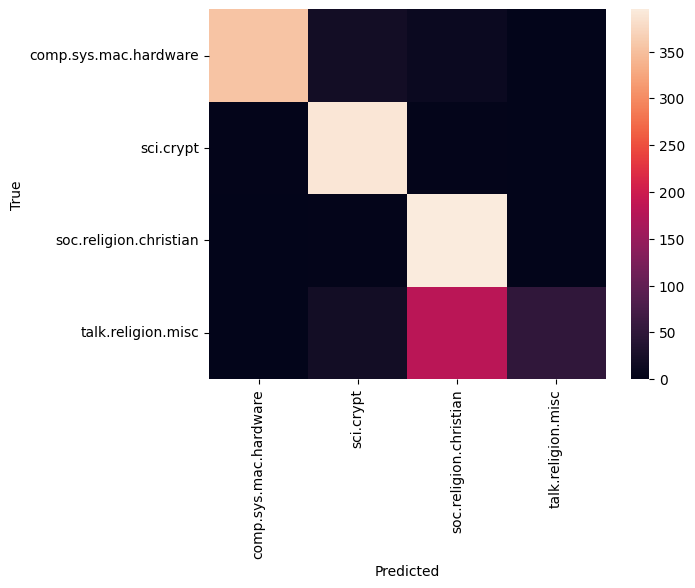

In [871]:
import seaborn as sns

sns.heatmap(cm_df)

## Cross Validation

In [881]:
from sklearn.model_selection import cross_val_score

In [884]:
data = digits.data
target = digits.target

In [893]:
model = GaussianNB()

In [899]:
score = cross_val_score(model, data, target)
score

array([0.78055556, 0.78333333, 0.79387187, 0.8718663 , 0.80501393])

In [900]:
score.mean()

np.float64(0.8069281956050759)